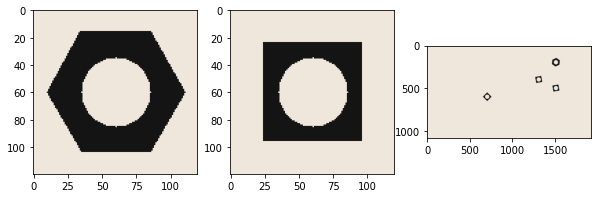

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


Threshold value for hexnut_template is 20.0
Threshold value for squarenut_template is 20.0
Threshold value for conveyor_f100 is 20.0


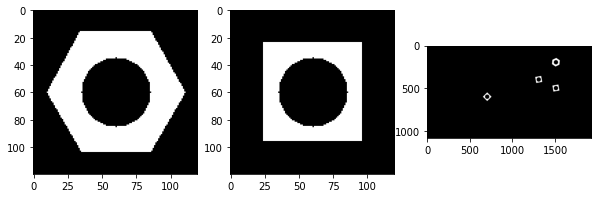

In [2]:
hexnut_template_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

#blur1 = cv.GaussianBlur(hexnut_template_gray,(5,5),0)
ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#blur2 = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#blur3 = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th1,th2,th3=cv.bitwise_not(th1),cv.bitwise_not(th2),cv.bitwise_not(th3)

print("Threshold value for hexnut_template is",ret1)
print("Threshold value for squarenut_template is",ret2)
print("Threshold value for conveyor_f100 is",ret3)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
plt.show()


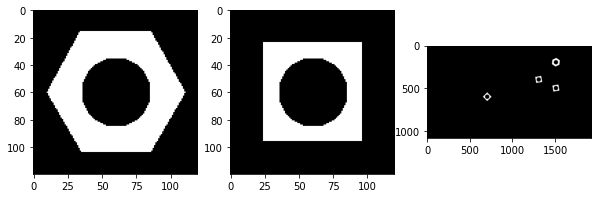

In [3]:
kernel=np.ones((3,3),np.uint8)
closing1= cv.morphologyEx(th1,cv.MORPH_CLOSE,kernel)
closing2= cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3= cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(closing1,cmap='gray')
ax[1].imshow(closing2,cmap='gray')
ax[2].imshow(closing3,cmap='gray')
plt.show()


In [5]:
connectivity = 4
num_labels1,labels1,stats1,centroids1=cv.connectedComponentsWithStats(closing1, connectivity)
num_labels2,labels2,stats2,centroids2=cv.connectedComponentsWithStats(closing2, connectivity)
num_labels3,labels3,stats3,centroids3=cv.connectedComponentsWithStats(closing3, connectivity)

print('Number of connected components in hexnut_template is', num_labels1)
for r in range(num_labels1):
    print('Component',r)
    print(stats1[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate ')
    print(stats1[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats1[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats1[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats1[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')

print('Number of connected components in squarenut_template is', num_labels2)
for r in range(num_labels2):
    print('Component',r)
    print(stats2[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate')
    print(stats2[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats2[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats2[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats2[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')

print('Number of connected components in conveyor_f100 is', num_labels3)
for r in range(num_labels3):
    print('Component',r)
    print(stats3[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate ')
    print(stats3[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats3[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats3[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats3[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')


Number of connected components in hexnut_template is 2
Component 0
0 	 : The leftmost (x) coordinate 
0 	 : The topmost (y) coordinate 
120 	 : The horizontal size of bounding box 
120 	 : The vertical size of bounding box
9672 	 : The total are of connected components in pixels

Component 1
10 	 : The leftmost (x) coordinate 
16 	 : The topmost (y) coordinate 
101 	 : The horizontal size of bounding box 
88 	 : The vertical size of bounding box
4728 	 : The total are of connected components in pixels

Number of connected components in squarenut_template is 2
Component 0
0 	 : The leftmost (x) coordinate 
0 	 : The topmost (y) coordinate 
120 	 : The horizontal size of bounding box 
120 	 : The vertical size of bounding box
11173 	 : The total are of connected components in pixels

Component 1
24 	 : The leftmost (x) coordinate 
24 	 : The topmost (y) coordinate 
72 	 : The horizontal size of bounding box 
72 	 : The vertical size of bounding box
3227 	 : The total are of connected com